# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

## Global methods & vars

In [98]:
import os
import time
import logging
from datetime import timedelta

#image_shape = [32, 32, 3]

def  split(start_time):
    # method for messuring the relative time usage 
    split_time = time.time()
    time_dif   = split_time - start_time
    #time_str = str(timedelta(seconds = int(round(time_dif))))
    time_str = str(timedelta(seconds = int(time_dif)))
    return time_str

def init_logging():
    log_dir = 'dlnd-log/'
    if not os.path.exists(log_dir):
        os.makedirs(log_dir)
    log_path = os.path.join(log_dir, 'event.log')
    # remember to set level=logging.CRITICAL
    logging.basicConfig(filename=log_path, format='%(levelname)s: - %(asctime)s : - %(message)s', level=logging.CRITICAL)
    logging.info('log start')  # information about when the log is "restarted"

start_time =    time.time()
init_logging()

In [53]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


In [54]:
logging.debug("Finished looking for data files")

## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.

In [55]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import helper
import numpy as np

# Explore the dataset
# batch_id = 5
# sample_id = 500
# helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [56]:
def normalize(image_data):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    # My instructor suggested I use this generalised method but I get an assertion Error.
    # I probably mad a mistake.. Will go back to what worked ... sort it out later...
    #a = -0.5
    #b = 0.5
    #min_val = 0
    #max_val = 255
    #return a + ( ( (image_data - min_val)*(b - a) )/( max_val - min_val ) )

    x = image_data.astype('float32')
    if (x.max() > 1.0 and x.min() >= 0):
        x /= 255.0
    logging.debug("Data normalized")
    return x



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [57]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    lenghts=(len(x))
    result = np.zeros((lenghts, 10))
    temp = 0
    for i in range(lenghts):    
        temp = int(x[i])
        # print (x[i])
        if temp < 0:
            x[i] = 0
            print('Beware: Negative value was found, changed to zero')
        elif temp > 9:
            x[i] = 9
            print('Beware: A large value in the data, was changed to MAX (9)')
        
        result[i][x[i]] = 1
    logging.debug("Data one-hotted")
    return result

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [58]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

In [59]:
logging.debug("helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)")

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [60]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

In [61]:
logging.debug("[valid_features, valid_labels] ready for hyper parametre optimize")

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [62]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    logging.debug("neural_net_image_input")
    return tf.placeholder(tf.float32, [None, image_shape[0], image_shape[1], image_shape[2]], name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    logging.debug("neural_net_label_input")
    return tf.placeholder(dtype=tf.float32, shape=[None, n_classes], name="y")


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    logging.debug("neural_net_keep_prob_input")
    return tf.placeholder(dtype=tf.float32, name="keep_prob")


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.


In [63]:
def weight_variable(shape_weights):
    initial = tf.truncated_normal(shape_weights, stddev=0.04)
    return tf.Variable(initial)

def bias_variable(shape_b):
    initial = tf.constant(0.1, shape=shape_b)
    return tf.Variable(initial)

def conv2d(x_tensor, filter_weight, stride, c_padding):
    return tf.nn.conv2d(x_tensor, filter_weight, stride, c_padding)

def max_pool(x_tensor, pool_patch_sh, pool_stride_sh, mp_padding):
    return tf.nn.max_pool(x_tensor, pool_patch_sh, pool_stride_sh, mp_padding)
    
def conv2d_maxpool(x_tensor, conv_num_outp, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outp: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    #
    #global image_shape
    logging.debug("conv2d_maxpool(x_tensor, conv_num_outp, conv_ksize, conv_strides, pool_ksize, pool_strides)")

    tensor_shape  = x_tensor.get_shape().as_list()
    logging.debug("tensor_shape  = x_tensor.get_shape().as_list():%s", tensor_shape)
    shape_weights = [conv_ksize[0], conv_ksize[1], tensor_shape[3], conv_num_outp]
    filter_weight = weight_variable(shape_weights)  
        
    filter_bias   = bias_variable([conv_num_outp])
        
    stride       = [1, conv_strides[0], conv_strides[1],1]
    c_padding    = 'SAME'
    conv_out     = conv2d(x_tensor, filter_weight, stride, c_padding)
    bias_add_out = tf.nn.bias_add(conv_out, filter_bias)
    relu_out     = tf.nn.relu(bias_add_out)
    
    pool_patch_sh  = [1, pool_ksize[0],   pool_ksize[1], 1]
    pool_stride_sh = [1, pool_strides[0], pool_strides[1], 1]
    mp_padding     = 'VALID'
 
    return max_pool(relu_out, pool_patch_sh, pool_stride_sh, mp_padding)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [64]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    logging.debug("flatten(x_tensor)")
    tensor_shape = x_tensor.get_shape().as_list();
    logging.debug("tensor_shape  = x_tensor.get_shape().as_list():%s", tensor_shape)
    dim = int(tensor_shape[1] * tensor_shape[2] * tensor_shape[3])
    logging.debug("dim(%s) = int(%s*%s*%s)", dim, tensor_shape[1], tensor_shape[2], tensor_shape[3])
    logging.debug("return tf.reshape(x_tensor, [-1, dim])")
    return tf.reshape(x_tensor, [-1, dim])

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [65]:
def tensor_weight_bias(x_tensor, num_outputs):
    tensor_shape = x_tensor.get_shape().as_list();
    logging.debug("tensor_shape  = x_tensor.get_shape().as_list():%s", tensor_shape)
    num_input    = tensor_shape[1]
    
    
    weight_fc1 = weight_variable([num_input, num_outputs])
    biases_fc1 = bias_variable([num_outputs])

    mm_weight = tf.matmul(x_tensor, weight_fc1)
    mm_w_n_b  = tf.nn.bias_add(mm_weight, biases_fc1)
    return mm_w_n_b

def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    logging.debug("fully_conn(x_tensor, num_outputs)")
    
    mm_w_n_b = tensor_weight_bias(x_tensor, num_outputs)
    
    logging.debug("fully_conn ended - return tf.nn.relu(mm_w_n_b)")
  
    return tf.nn.relu(mm_w_n_b)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [66]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    logging.debug("output - return fully_conn(x_tensor, num_outputs)")
    return tensor_weight_bias(x_tensor, num_outputs)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [89]:
def conv_net(x, keep_prob,):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    # Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    # conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    logging.debug("conv_net(x, keep_prob,) - start")

    model = x
    model_shape = model.get_shape().as_list();
    logging.debug("model_shape  = model.get_shape().as_list():%s", model_shape)

    num_conv_layers       =  4
    outputs               = 15          # *n -> 15, 30, 45, 60 
    ck                    =  3          # +1 ->  3,  4,  5,  6
    conv_strides = (1,1)
    pool_ksize   = (2,2)
    pool_strides = (2,2)
    
    for n in range (1, num_conv_layers):
        conv_ksize   = (ck,ck)
        model = conv2d_maxpool(model, (outputs*n), conv_ksize, conv_strides, pool_ksize, pool_strides)
        model_shape = model.get_shape().as_list();
        logging.debug("model_shape  = model.get_shape().as_list():%s", model_shape)
        model = tf.nn.local_response_normalization(model)
        ck += 1
   
    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    model = flatten(model)
    model_shape = model.get_shape().as_list();
    logging.debug("model_shape  = model.get_shape().as_list():%s", model_shape)
    
    
    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    model = fully_conn(model, 28)
    model_shape = model.get_shape().as_list();
    logging.debug("model_shape  = model.get_shape().as_list():%s", model_shape)
    model = tf.nn.dropout(model, keep_prob)
    
    model = fully_conn(model, 14)
    model_shape = model.get_shape().as_list();
    logging.debug("model_shape  = model.get_shape().as_list():%s", model_shape)
    model = tf.nn.dropout(model, keep_prob)

    num_outputs = 10
    logging.debug("def conv_net(x, keep_prob,) - return output(model, num_outputs)")
    
    return output(model, num_outputs)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [90]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    logging.debug("def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch)")
    logging.debug("session.run(optimizer,feed_dict={x:feature_batch,y:label_batch,keep_prob:keep_probability})")
    return session.run(optimizer, feed_dict={   x: feature_batch,
                                                y: label_batch,
                                                keep_prob: keep_probability })


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [91]:
lowest_loss =   999     # initialize the global lowest loss 
best_epoch  =    -1     # init (to keep score of the best) 
no_learning = False     # True if no reduction in valid loss was recorded for "a while"
stop        =    10     # stop running when loss has not decreased for [stop] batch-lines
i           =     0     # init

def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    train_accu = session.run(accuracy, feed_dict={ keep_prob: 1., x:feature_batch, y:label_batch })
    train_loss = session.run(cost,     feed_dict={ keep_prob: 1., x:feature_batch, y:label_batch })
    
    # I should probably use the validation data for an evaluation of different combos of:
    # (nums&sizes of ConvNets compared to nums&sizes of the FC-Nets)  
    # I propose instead, just to use the validation data for setting a break on "no improvement"
    # when we're probably not likely to see anymore fall in loss (or increase in accuracy) 
    # assuming the Nets performace must have plateaued (or the loss might even have increased).

    global lowest_loss      # lowest loss measured on a valid batch so far
    global best_epoch       # to keep score of the best 
    
    global no_learning      # True if no reduction in valid loss was recorded for "a while"
    global stop             # stop running when loss has not decreased for [stop] batch-lines
    global i                # init

    valid_accu = session.run(accuracy, feed_dict={ keep_prob: 1., x:valid_features, y:valid_labels })
    valid_loss = session.run(cost,     feed_dict={ keep_prob: 1., x:valid_features, y:valid_labels })

    time_pass = ''
    time_pass = split(start_time)
    msg = "since start {0:>10} Loss-tr:{1:>7.5}, Accu-tr:{2:>7.2%} Loss-Val:{3:>7.5}, Accu-Val:{4:>7.2%} "
    logging.info(msg.format(time_pass, train_loss, train_accu, valid_loss, valid_accu))
    print       (msg.format(time_pass, train_loss, train_accu, valid_loss, valid_accu))
    
    if valid_loss < lowest_loss:
        lowest_loss = valid_loss
        best_epoch  = epoch
        i = 0
        time_pass = ''
        time_pass = split(start_time)
        msg="lowest_loss: {:>7.5} best_epoch: {:>3} i:{} "
        logging.info(msg.format(lowest_loss, best_epoch+1, i))
        print       (msg.format(lowest_loss, best_epoch+1, i))
    else:
        if (i < stop): 
            i += 1
            logging.debug("i:%s",i)
        else:
            no_learning = True

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [92]:
# TODO: Tune Parameters
epochs           =     1
batch_size       =    16
keep_probability =     0.85   # used in conjunction with dropout
lowest_loss      =   999      # initialize the global lowest loss 
stop             =    10      # stop running when loss has not decreased for [stop] batch-lines
no_learning      = False      # no reduction in valid loss was recorded for "a while"
i                =     0      # init

start_time =    time.time()
init_logging()

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [93]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>3}, Batch {} '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)
print("finished !!!!\n\n")

Checking the Training on a Single Batch...
Epoch   1, Batch 1 since start    0:00:56 Loss-tr: 1.9254, Accu-tr: 25.00% Loss-Val: 2.0355, Accu-Val: 22.10% 
lowest_loss:  2.0355 best_epoch:   1 i:0 
finished !!!!




### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [94]:
# TODO: Tune Parameters
epochs           =     1
batch_size       =    16
keep_probability =     0.85   # used in conjunction with dropout
lowest_loss      =   999      # initialize the global lowest loss 
stop             =    10      # stop running when loss has not decreased for [stop] batch-lines
no_learning      = False      # no reduction in valid loss was recorded for "a while"
i                =     0      # init

start_time =    time.time()
init_logging()

In [95]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>3}, Batch {} '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            if (no_learning == True):
                break                 # no reduction in loss was recorded for "a while"
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)
print("finished Fully Train the Model!!\n\n")


Training...
Epoch   1, Batch 1 since start    0:00:56 Loss-tr: 2.0756, Accu-tr: 12.50% Loss-Val: 2.0579, Accu-Val: 22.20% 
lowest_loss:  2.0579 best_epoch:   1 i:0 
Epoch   1, Batch 2 since start    0:01:47 Loss-tr:  1.908, Accu-tr: 37.50% Loss-Val: 1.8765, Accu-Val: 28.20% 
lowest_loss:  1.8765 best_epoch:   1 i:0 
Epoch   1, Batch 3 since start    0:02:37 Loss-tr: 1.7272, Accu-tr: 12.50% Loss-Val:  1.724, Accu-Val: 32.82% 
lowest_loss:   1.724 best_epoch:   1 i:0 
Epoch   1, Batch 4 since start    0:03:28 Loss-tr:  1.714, Accu-tr: 12.50% Loss-Val: 1.6568, Accu-Val: 35.90% 
lowest_loss:  1.6568 best_epoch:   1 i:0 
Epoch   1, Batch 5 since start    0:04:20 Loss-tr: 1.6801, Accu-tr: 25.00% Loss-Val: 1.6475, Accu-Val: 37.82% 
lowest_loss:  1.6475 best_epoch:   1 i:0 
finished Fully Train the Model!!




# Checkpoint
The model has been saved to disk.

## ...Continue training

In [96]:
# Need to change ?: Tune Parameters
Manual_load      = False
epochs           =    20
batch_size       =   200
keep_probability =     0.85   # used in conjunction with dropout
lowest_loss      =   999      # initialize the global lowest loss 
stop             =    10      # stop running when loss has not decreased for stop batch-lines
no_learning      = False      # no reduction in valid loss was recorded for "a while"
i                =     0      # init

start_time =    time.time()
init_logging()

msg = "Tune Parameters:    epochs  {0:>5},  batch_size  {1:>5}, keep_probability: {2:>5.0%} "
logging.info(msg.format(epochs, batch_size, keep_probability))
print (msg.format(epochs, batch_size,  keep_probability))
msg = "lowest_loss {0:>5},    stop  {1:>5},  no_learning: {2}                     i:{3}"
logging.info(msg.format(lowest_loss, stop, no_learning, i))
print (msg.format(lowest_loss, stop, no_learning, i))

save_model_path = './image_classification'

chp_dir = 'chapters/'
if not os.path.exists(chp_dir):
    os.makedirs(chp_dir)
chp_path = os.path.join(chp_dir, 'chapter')

if (Manual_load == True):                   # for "manual" chapter loads
    save_model_path = "./chapter3"
    
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,save_model_path)
    logging.info("restored : %s", save_model_path)
    print("restored :", save_model_path)
    
    if (Manual_load == True):               # after manual loads
        save_model_path = './image_classification'
        
    # Training cycle
    print('...Continue training...')
    for epoch in range(epochs):
        saver = tf.train.Saver()
        chp_path_num = chp_path+str(epoch)
        chapter = saver.save(sess, chp_path_num)
        msg="saved {:>30}"
        logging.info(msg.format(chp_path_num))
        print(msg.format(chp_path_num))
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            msg='Epoch {:>3}, Batch {} '
            print(msg.format((epoch + 1), batch_i), end='')
            logging.info(msg.format(epoch + 1, batch_i))
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            if (no_learning == True):
                msg="no_learning=={0} - # no reduction in loss was recorded since epoch {1}"
                logging.info(msg.format(no_learning, best_epoch))
                print(msg.format(no_learning, best_epoch))
                break                 # no reduction in loss was recorded for "a while"
        if (no_learning == True):
            msg="no_learning=={0} - # no reduction in loss was recorded since epoch {1}"
            logging.info(msg.format(no_learning, best_epoch))
            print(msg.format(no_learning, best_epoch))
            break                 # no reduction in loss was recorded for "a while"

    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)
logging.info("finished ...Continue training !!!!\n")
print("finished ...Continue training !!!!\n\n")

Tune Parameters:    epochs     20,  batch_size    200, keep_probability:   85% 
lowest_loss   999,    stop     10,  no_learning: False                     i:0
restored : ./image_classification
...Continue training...
saved              chapters/chapter0
Epoch   1, Batch 1 since start    0:00:50 Loss-tr: 1.7215, Accu-tr: 34.00% Loss-Val: 1.5579, Accu-Val: 41.06% 
lowest_loss:  1.5579 best_epoch:   1 i:0 
Epoch   1, Batch 2 since start    0:01:36 Loss-tr: 1.5874, Accu-tr: 41.50% Loss-Val: 1.5443, Accu-Val: 41.76% 
lowest_loss:  1.5443 best_epoch:   1 i:0 
Epoch   1, Batch 3 since start    0:02:22 Loss-tr: 1.3833, Accu-tr: 52.00% Loss-Val: 1.5331, Accu-Val: 41.78% 
lowest_loss:  1.5331 best_epoch:   1 i:0 
Epoch   1, Batch 4 since start    0:03:07 Loss-tr: 1.4748, Accu-tr: 41.50% Loss-Val: 1.5258, Accu-Val: 41.78% 
lowest_loss:  1.5258 best_epoch:   1 i:0 
Epoch   1, Batch 5 since start    0:03:53 Loss-tr: 1.4775, Accu-tr: 44.00% Loss-Val: 1.5173, Accu-Val: 42.02% 
lowest_loss:  1.5173 be

## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

Testing Accuracy: 0.6239999985694885



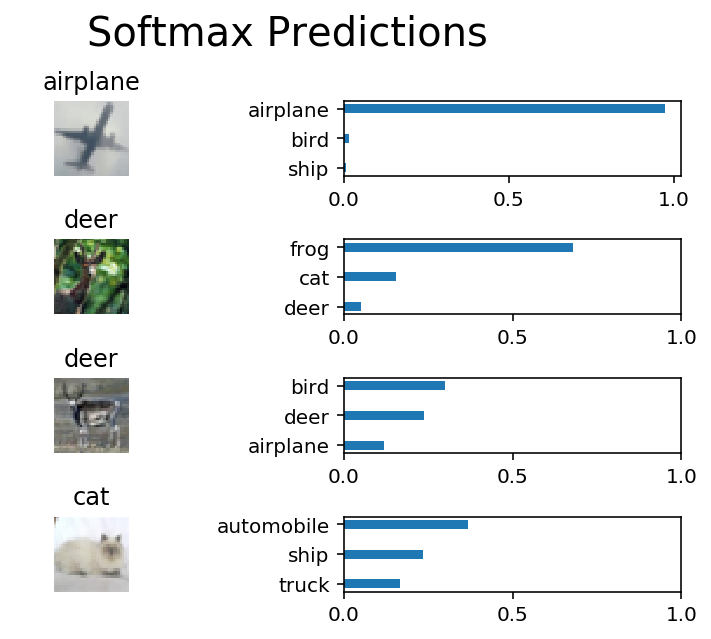

In [97]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-70% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 70%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.